In [1]:
## genenrate bounding box using google genai

In [23]:
from mb_annotation.bounding_box import google_model,generate_bounding_box,add_bounding_box
from mb_annotation.utils import load_env_file

In [3]:
import os
load_env_file('./env');

In [4]:
model = google_model(model="gemini-1.5-pro-latest",api_key=os.environ.get("GOOGLE_API_KEY"))

In [5]:
res =generate_bounding_box(model,image_path="/home/malav/Downloads/boilled_eggs.jpeg",prompt='Return bounding boxes of container, for each only one return [xmin,ymin, xmax, ymax]')

In [6]:
import json
if type(res) != dict:
    try:
        res = json.loads(res.text)
    except:
        res = eval(res.text)
print(res)

{'container': [182, 0, 904, 998]}


In [7]:
img_bb,value = add_bounding_box(image_path="/home/malav/Downloads/boilled_eggs.jpeg",bounding_box=res,label="container",box_resize=True,show=False)

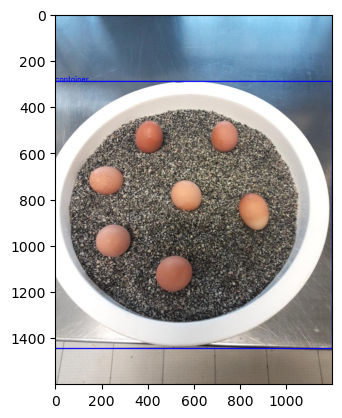

In [8]:
import matplotlib.pyplot as plt
plt.imshow(img_bb)
plt.show()

In [9]:
## Getting mask 

In [24]:
from mb_annotation.sam2 import get_mask_for_bbox,get_all_masks,show_anns
from mb_annotation.bounding_box import add_bounding_box


In [11]:
mask_img,mask_bbox,main_bbox = get_mask_for_bbox(image_path="/home/malav/Downloads/boilled_eggs.jpeg",bbox_value=value,sam2_checkpoint='/home/malav/Desktop/segment-anything-2/checkpoints/sam2_hiera_small.pt',model_cfg='./sam2_hiera_s.yaml',show_final=False)


Getting mask
Getting final mask


In [12]:
value

[291, 0, 1446, 1197]

In [13]:
mask_bbox

[293.0, 0.0, 1436.0, 1183.0]

In [14]:
main_bbox

[[775.0, 793.0, 935.0, 924.0],
 [1045.0, 436.0, 1203.0, 593.0],
 [911.0, 176.0, 1052.0, 325.0],
 [413.0, 62.0, 1331.0, 1048.0],
 [719.0, 501.0, 851.0, 634.0],
 [462.0, 346.0, 603.0, 466.0],
 [463.0, 674.0, 598.0, 791.0],
 [461.0, 346.0, 603.0, 780.0],
 [659.0, 147.0, 782.0, 296.0],
 [659.0, 147.0, 1041.0, 296.0],
 [293.0, 0.0, 1436.0, 1183.0],
 [1450.0, 913.0, 1599.0, 1174.0],
 [1446.0, 689.0, 1599.0, 1136.0],
 [1446.0, 690.0, 1599.0, 919.0],
 [1443.0, 250.0, 1599.0, 690.0],
 [1444.0, 466.0, 1599.0, 690.0],
 [1456.0, 1136.0, 1599.0, 1199.0],
 [1448.0, 8.0, 1599.0, 247.0],
 [1448.0, 10.0, 1599.0, 466.0],
 [1446.0, 482.0, 1599.0, 920.0],
 [1446.0, 238.0, 1599.0, 467.0],
 [1448.0, 0.0, 1599.0, 31.0]]

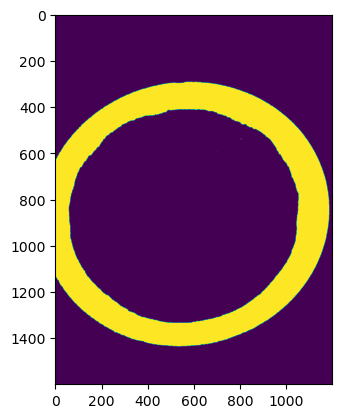

In [15]:
import matplotlib.pyplot as plt
plt.imshow(mask_img)
plt.show()

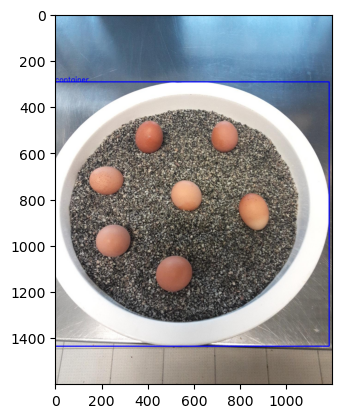

In [16]:
img_bb2,value2 = add_bounding_box(image_path="/home/malav/Downloads/boilled_eggs.jpeg",bounding_box=mask_bbox,label="container",box_resize=False,show=False)
plt.imshow(img_bb2)
plt.show()


In [17]:
mask_full = get_all_masks(image_path="/home/malav/Downloads/boilled_eggs.jpeg",sam2_checkpoint='/home/malav/Desktop/segment-anything-2/checkpoints/sam2_hiera_small.pt',model_cfg='./sam2_hiera_s.yaml')

Getting all masks
Getting final mask


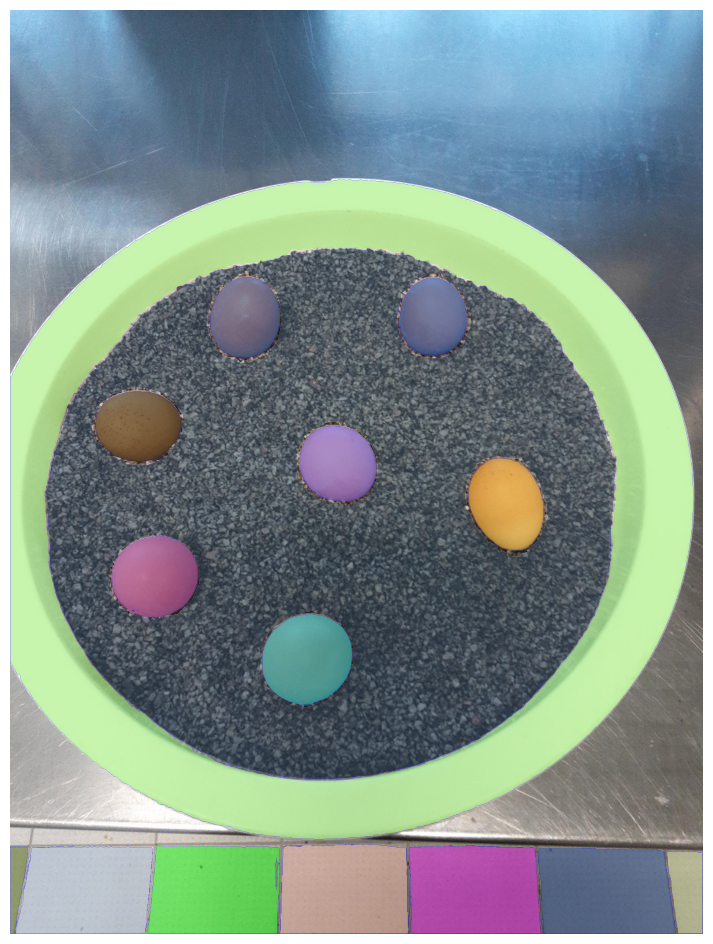

In [32]:
import cv2
image = cv2.imread("/home/malav/Downloads/boilled_eggs.jpeg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12,12))
plt.imshow(image)
show_anns(mask_full)
plt.axis('off')
plt.show()